In [111]:
from scipy.integrate import quad
from scipy.fft import fft, fftfreq
from matplotlib import pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [112]:
c = pow(10, -6)
T = 0.5 * c

In [113]:
def s(t):
    a = 1
    b = -0.5
    if 0 <= t <= T: return a*t + b
    else: return 0

1. Построить график аналогового сигнала.

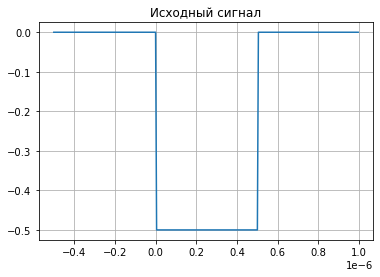

In [114]:
x = [i for i in np.arange(-T, 2*T, T/100)]
y = [s(i) for i in x]
plt.title("Исходный сигнал")
plt.grid(True)
plt.plot(x, y)

2. Определить граничную частоту (верхнюю частоту) аналогового сигнала.

In [115]:
def s2(t):
    return s(t)**2

Ec = quad(s2, 0, T)[0]
Ec

1.2499987500004168e-07

In [116]:
def sCos(t, w):
    return s(t) * np.cos(t * w)

def Aw(w):
    return quad(sCos, 0, T, args=(w))[0]

In [117]:
def sSin(t, w):
    return s(t) * np.sin(t * w)

def Bw(w):
    return quad(sSin, 0, T, args=(w))[0]

In [118]:
def Sw(w):
    return np.sqrt(pow(Aw(w), 2) + pow(Bw(w), 2))

def Sw2(w):
    return pow(Sw(w), 2)

In [119]:
Ew = 0
f = 1 / T
w1 = 2 * np.pi * f
wmax = 0
while Ew / Ec <= 0.95:
    Ew = (1 / np.pi) * quad(Sw2, 0, wmax)[0]
    wmax += w1 / 20
print("Граничная частота: ", int(wmax), 'Гц\nРазница: ', np.round(Ew / Ec, 3), '%')

Граничная частота:  27017696 Гц
Разница:  0.95 %


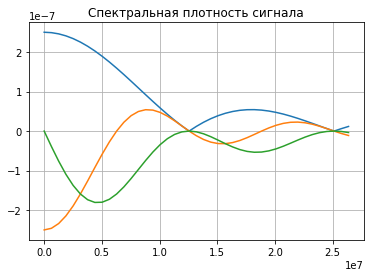

In [120]:
x = [i for i in np.arange(0, wmax, w1/20)]
y = [Sw(i) for i in x]
y2 = [Aw(i) for i in x]
y3 = [Bw(i) for i in x]
plt.grid(True)
plt.title("Спектральная плотность сигнала")
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

3. Определить частоту дискретизации аналогового сигнала

In [121]:
fd = 2 * wmax
print('Частота дискретизации аналогового сигнала:', int(fd), 'Гц')

Частота дискретизации аналогового сигнала: 54035393 Гц


4. Сгенерировать дискретный сигнал в виде массива чисел и построить его график

In [122]:
Td = 1/fd
print('Шаг дискретизации:', Td)

Шаг дискретизации: 1.8506388731615756e-08


In [123]:
N = int(1 + T/Td)
if N % 2 != 0: N += 1
print('Количество отсчетных значений:', N)

Количество отсчетных значений: 28


In [124]:
Td2 = T / (N - 1)
print('Шаг дискретизации (по выбранному значению отсчетов):', Td2)

Шаг дискретизации (по выбранному значению отсчетов): 1.8518518518518518e-08


In [125]:
Sd = []
i = 0
while i < 28:
    Sd.append([i*Td2, s(i*Td2)])
    i += 1
Sd

[[0.0, -0.5],
 [1.8518518518518518e-08, -0.4999999814814815],
 [3.7037037037037036e-08, -0.49999996296296295],
 [5.5555555555555555e-08, -0.49999994444444446],
 [7.407407407407407e-08, -0.4999999259259259],
 [9.259259259259259e-08, -0.4999999074074074],
 [1.1111111111111111e-07, -0.4999998888888889],
 [1.2962962962962961e-07, -0.49999987037037036],
 [1.4814814814814815e-07, -0.49999985185185186],
 [1.6666666666666668e-07, -0.4999998333333333],
 [1.8518518518518518e-07, -0.4999998148148148],
 [2.0370370370370369e-07, -0.4999997962962963],
 [2.2222222222222222e-07, -0.49999977777777777],
 [2.4074074074074075e-07, -0.49999975925925927],
 [2.5925925925925923e-07, -0.4999997407407407],
 [2.7777777777777776e-07, -0.4999997222222222],
 [2.962962962962963e-07, -0.4999997037037037],
 [3.148148148148148e-07, -0.49999968518518517],
 [3.3333333333333335e-07, -0.4999996666666667],
 [3.5185185185185183e-07, -0.4999996481481481],
 [3.7037037037037036e-07, -0.4999996296296296],
 [3.888888888888889e-07

<BarContainer object of 28 artists>

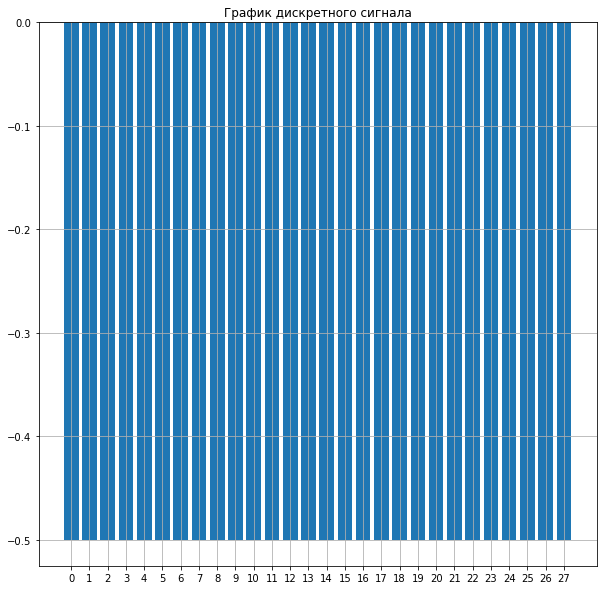

In [126]:
n = [i for i in range(N)]
y = [i[1] for i in Sd]
plt.figure(figsize=(10, 10))
plt.title('График дискретного сигнала')
plt.xticks(n, n)
plt.grid(True)
plt.bar(n, y)

5. Выполнить квантование дискретного сигнала с шагом, соответствующим представлению отсчетов 4-битным числом

In [127]:
M = pow(2, 4)
print('Количество уровней квантования:', M)

Количество уровней квантования: 16


In [128]:
y = [s(i) for i in np.arange(-0.5*T, 1.5*T, T/100)]
ymax = np.max(y)
ymin = np.min(y)
delta = (ymax - ymin)/(M - 1)
print('Шаг квантования:', delta)

Шаг квантования: 0.03333333333333333


In [129]:
n = [i for i in range(N)]
yd = [int(np.round(Sd[i][1] / delta)) for i in n]
[delta * i for i in yd]

[-0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5]

<BarContainer object of 28 artists>

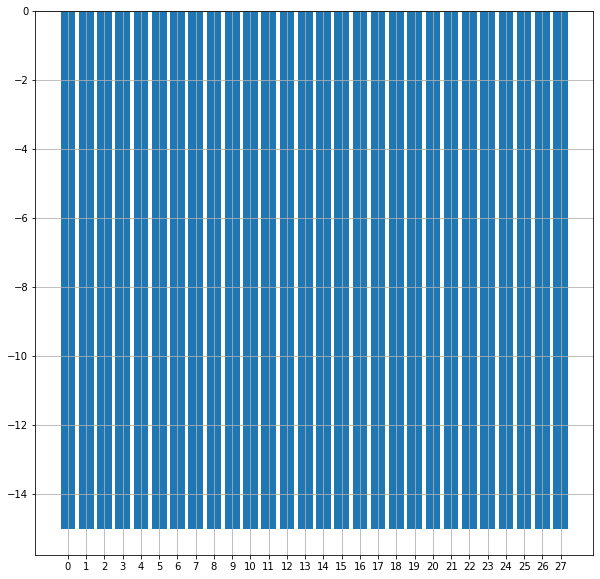

In [130]:
x = [bin(i) for i in range(M)]
plt.figure(figsize=(10, 10))
#plt.yticks(yd, yd)
plt.xticks(n, n)
plt.grid(True)
plt.bar(n, yd)